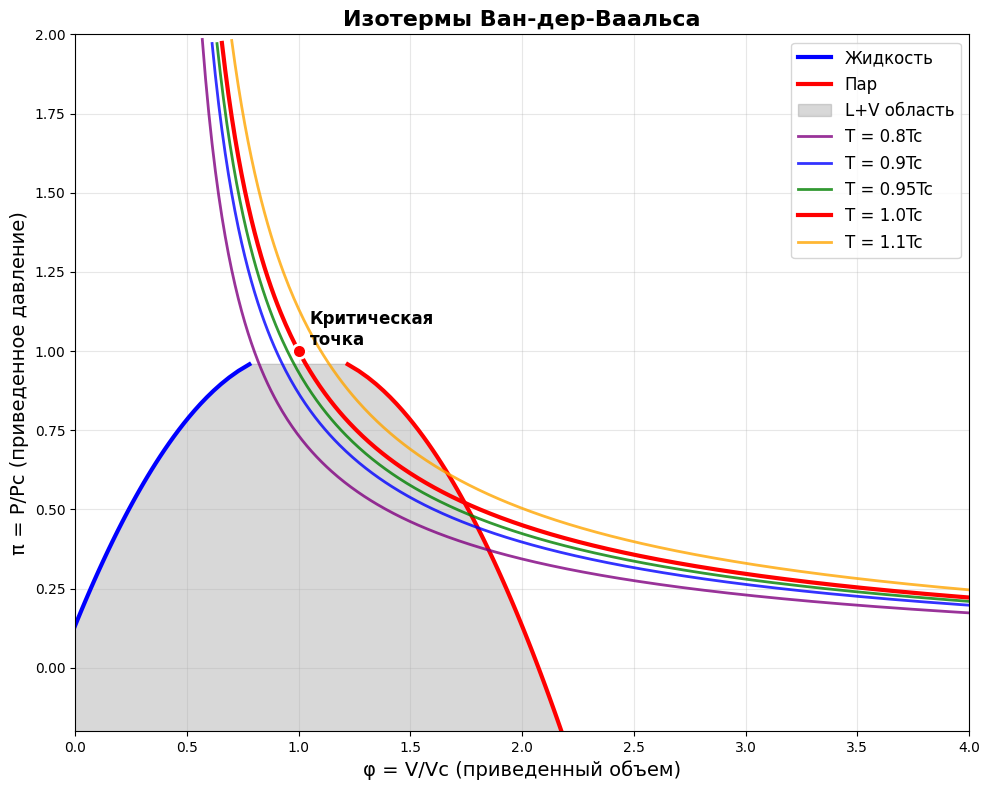

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Простая бинодаль по закону Гульдберга
fig, ax = plt.subplots(figsize=(10, 8))

# Температуры от 0.5 до 0.99 от критической
T = np.linspace(0.5, 0.99, 100)

# Закон Гульдберга: V/Vc = 1 ± 2.2*(1-T/Tc)^0.5
A = 2.2
beta = 0.5

V_liquid = 1 - A * (1 - T)**beta  # жидкость
V_vapor = 1 + A * (1 - T)**beta   # пар

# Давление: P/Pc = 1 - 4.2*(1-T/Tc)
B = 4.2
P = 1 - B * (1 - T)

# Рисуем бинодаль (колокол)
ax.plot(V_liquid, P, 'b-', linewidth=3, label='Жидкость')
ax.plot(V_vapor, P, 'r-', linewidth=3, label='Пар') 

# Заливаем двухфазную область
V_bell = np.concatenate([V_liquid, V_vapor[::-1]])
P_bell = np.concatenate([P, P[::-1]])
ax.fill(V_bell, P_bell, alpha=0.3, color='gray', label='L+V область')

# Изотермы Ван-дер-Ваальса
V_iso = np.linspace(0.35, 4, 500)
temperatures = [0.8, 0.9, 0.95, 1.0, 1.1]
colors = ['purple', 'blue', 'green', 'red', 'orange']

for T_iso, color in zip(temperatures, colors):
    P_iso = []
    V_plot = []
    
    for V in V_iso:
        if V > 1/3:  # V должно быть больше b = Vc/3
            try:
                # P = 8T/3 / (3V-1) - 3/(3V)^2
                P_vdw = (8*T_iso/3) / (3*V - 1) - 3/(3*V)**2
                if P_vdw > 0 and P_vdw < 2:
                    P_iso.append(P_vdw)
                    V_plot.append(V)
            except:
                continue
    
    if P_iso:
        linewidth = 3 if T_iso == 1.0 else 2
        alpha = 1.0 if T_iso == 1.0 else 0.8
        ax.plot(V_plot, P_iso, color=color, linewidth=linewidth, 
                alpha=alpha, label=f'T = {T_iso}Tc')

# Критическая точка
ax.plot(1, 1, 'ko', markersize=10, markerfacecolor='red', 
        markeredgecolor='white', markeredgewidth=2)
ax.text(1.05, 1.02, 'Критическая\nточка', fontsize=12, fontweight='bold')

ax.set_xlim(0, 4)
ax.set_ylim(-0.2, 2)
ax.set_xlabel('φ = V/Vc (приведенный объем)', fontsize=14)
ax.set_ylabel('π = P/Pc (приведенное давление)', fontsize=14) 
ax.set_title('Изотермы Ван-дер-Ваальса', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()